## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import classification_report

import numpy as np 

%matplotlib inline

In [2]:
df_train = pd.read_csv("../input/dataset-vologda/train_dataset_train.csv")
df_test = pd.read_csv("../input/dataset-vologda/test_dataset_test (1).csv")

## Рассмотрим датасет по ближе

In [3]:
df_train.head(3).T

,0,1,2
RecordNo,6145,7006,1124
Название книги,Зулейха открывает глаза,Зулейха открывает глаза,Дети мои
Автор,Гузель Яхина,Гузель Яхина,Гузель Яхина
Ссылка на литрес,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/guzel-yahina/deti-moi/
Рейтинг,4.7,4.6,4.4
Количество оценок,3922,24719,8032
Количество отзывов,408,2103,702
Имя читателя,Айгуль Ляпина,Olga T,Кирилл Чириков
Оценка книги читателем (из 5 баллов),5.0,5.0,5.0
Отзыв,Рекомендую книгу в прочтению/прослушиванию. Ес...,"Удивительно, что сейчас возникает ТАКАЯ литера...","Душевно, жизненно, чувственно, проникновенно!!..."


In [4]:
df_train.shape

(4839, 17)

## Добавим новых признаков

<AxesSubplot:>

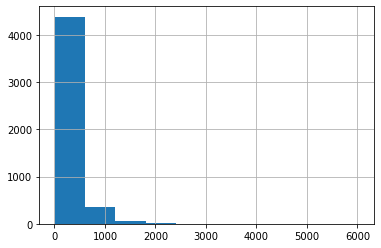

In [5]:
df_train["len_reviews"] = df_train["Отзыв"].map(len)
df_test["len_reviews"] = df_test["Отзыв"].map(len)
df_train["len_reviews"].hist()

In [6]:
df_train.columns

Index(['RecordNo', 'Название книги', 'Автор', 'Ссылка на литрес', 'Рейтинг',
       'Количество оценок', 'Количество отзывов', 'Имя читателя',
       'Оценка книги читателем (из 5 баллов)', 'Отзыв', 'Лайки на отзыв',
       'Дислайки на отзыв', 'Релевантность', 'Таксономия релевантные',
       'Таксономия не релевантные', 'Длина отзыва', 'Ценности', 'len_reviews'],
      dtype='object')

In [7]:
#df_train[ordenc_cols]

In [8]:
from sklearn.preprocessing import OrdinalEncoder

ordenc_cols = ['Название книги', ]

ordenc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df_train['Автор enc'] = ordenc.fit_transform(df_train[['Автор']])
df_test['Автор enc'] = ordenc.transform(df_test[['Автор']])

In [9]:
ordenc_2 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df_train['Название книги enc'] = ordenc_2.fit_transform(df_train[['Название книги']])
df_test['Название книги enc'] = ordenc_2.transform(df_test[['Название книги']])

In [10]:
ordenc_3 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df_train['Имя читателя enc'] = ordenc_3.fit_transform(df_train[['Имя читателя']])
df_test['Имя читателя enc'] = ordenc_3.transform(df_test[['Имя читателя']])

In [11]:
df_train.head().T

,0,1,2,3,4
RecordNo,6145,7006,1124,4716,2946
Название книги,Зулейха открывает глаза,Зулейха открывает глаза,Дети мои,ПОСТ,ПОСТ
Автор,Гузель Яхина,Гузель Яхина,Гузель Яхина,Дмитрий Глуховский,Дмитрий Глуховский
Ссылка на литрес,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/guzel-yahina/deti-moi/,https://www.litres.ru/dmitriy-gluhovskiy/post/,https://www.litres.ru/dmitriy-gluhovskiy/post-...
Рейтинг,4.7,4.6,4.4,3.9,4.4
Количество оценок,3922,24719,8032,430,832
Количество отзывов,408,2103,702,48,113
Имя читателя,Айгуль Ляпина,Olga T,Кирилл Чириков,Kimetov Oleg,Сергей Никитин
Оценка книги читателем (из 5 баллов),5.0,5.0,5.0,5.0,5.0
Отзыв,Рекомендую книгу в прочтению/прослушиванию. Ес...,"Удивительно, что сейчас возникает ТАКАЯ литера...","Душевно, жизненно, чувственно, проникновенно!!...",Очень понравилось. Причем понравилось больше «...,Круто. Автор и он же чтец – гений. Прослушал н...


In [12]:
df_train = df_train.fillna(0)

In [13]:
df_test.head().T

,0,1,2,3,4
RecordNo,3366,3952,6852,4586,4677
Название книги,Дети мои,Текст,Текст,Зулейха открывает глаза,Зулейха открывает глаза
Автор,Гузель Яхина,Дмитрий Глуховский,Дмитрий Глуховский,Гузель Яхина,Гузель Яхина
Ссылка на литрес,https://www.litres.ru/guzel-yahina/deti-moi/,https://www.litres.ru/dmitriy-gluhovskiy/tekst...,https://www.litres.ru/dmitriy-gluhovskiy/tekst/,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/guzel-yahina/zuleyha-otk...
Рейтинг,4.4,4.5,4.4,4.6,4.6
Количество оценок,8032,1923,7276,24719,24719
Количество отзывов,702,246,622,2103,2103
Имя читателя,Марина Ефимкина,alexvarp,fb_154207611938008,Мария Курочкина,sahnovavera
Оценка книги читателем (из 5 баллов),5.0,5.0,5.0,NaN,NaN
Отзыв,"Настоящая глубокая книга, коих сейчас очень не...",Одна из лучших книг прочитанных за последние г...,"Тот случай, когда невозможно пройти мимо, не о...","Очень не глубокая книга. Дочитала до конца, в ...","Очень понравилась. Читается легко, о непростых..."


## Выделим выборки

In [14]:
label_cols = ['Релевантность', 'Таксономия релевантные', 'Таксономия не релевантные', 'Длина отзыва', 'Ценности']
train_cols = ['Рейтинг', 'Количество оценок', 'Количество отзывов',
       'Оценка книги читателем (из 5 баллов)', 'Лайки на отзыв',
       'Дислайки на отзыв',  'Автор enc', 'Название книги enc', 'Имя читателя enc']

In [15]:
labels = []
for col in label_cols:
    labels.append(df_train[col])


In [16]:
col_num = 2
labels_ = labels[col_num]
print(label_cols[col_num])
labels_.value_counts()

Таксономия не релевантные


0    4225
1     614
Name: Таксономия не релевантные, dtype: int64

In [17]:
X_full = df_train[train_cols]
X_test = df_test[train_cols]

X_full.shape

(4839, 9)

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split( X_full, labels_, test_size=0.15, random_state=42)

# Модель

In [19]:

for model2 in [CatBoostClassifier(), XGBClassifier(), LGBMClassifier()]:

    print(model2)
    model2.fit(X_train, y_train, verbose=0)
    pred_train = model2.predict(X_train)
    print(classification_report(pred_train, y_train))
    pred_valid = model2.predict(X_valid)
    print(classification_report(pred_valid, y_valid))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4031
           1       0.16      0.99      0.27        82

    accuracy                           0.89      4113
   macro avg       0.58      0.94      0.61      4113
weighted avg       0.98      0.89      0.93      4113

              precision    recall  f1-score   support

           0       1.00      0.86      0.93       723
           1       0.03      1.00      0.06         3

    accuracy                           0.87       726
   macro avg       0.51      0.93      0.49       726
weighted avg       1.00      0.87      0.92       726

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interact

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3967
           1       0.28      0.99      0.44       146

    accuracy                           0.91      4113
   macro avg       0.64      0.95      0.69      4113
weighted avg       0.97      0.91      0.93      4113

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       715
           1       0.05      0.45      0.09        11

    accuracy                           0.86       726
   macro avg       0.52      0.66      0.51       726
weighted avg       0.98      0.86      0.91       726



In [20]:
model = LGBMClassifier()
model.fit(X_train, y_train)#, verbose=0)



pred_train = model.predict(X_train)
print(classification_report(pred_train, y_train))
pred_valid = model.predict(X_valid)
print(classification_report(pred_valid, y_valid))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3967
           1       0.28      0.99      0.44       146

    accuracy                           0.91      4113
   macro avg       0.64      0.95      0.69      4113
weighted avg       0.97      0.91      0.93      4113

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       715
           1       0.05      0.45      0.09        11

    accuracy                           0.86       726
   macro avg       0.52      0.66      0.51       726
weighted avg       0.98      0.86      0.91       726



## Оценка точности

In [21]:
X_test = X_test.fillna(0)
X_test

,Рейтинг,Количество оценок,Количество отзывов,Оценка книги читателем (из 5 баллов),Лайки на отзыв,Дислайки на отзыв,Автор enc,Название книги enc,Имя читателя enc
0,4.4,8032,702,5.0,2,0,23.0,27.0,-1.0
1,4.5,1923,246,5.0,1,0,27.0,92.0,-1.0
2,4.4,7276,622,5.0,0,0,27.0,92.0,-1.0
3,4.6,24719,2103,0.0,4,0,23.0,41.0,-1.0
4,4.6,24719,2103,0.0,0,1,23.0,41.0,-1.0
...,...,...,...,...,...,...,...,...,...
2070,4.6,24719,2103,5.0,0,1,23.0,41.0,-1.0
2071,4.4,8032,702,4.0,0,0,23.0,27.0,52.0
2072,4.6,24719,2103,5.0,0,1,23.0,41.0,-1.0
2073,4.8,1455,189,5.0,0,0,44.0,79.0,-1.0


In [22]:
df_test[label_cols[col_num]] = model.predict(X_test)
df_test.T

,0,1,2,3,4,5,6,7,8,9,...,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074
RecordNo,3366,3952,6852,4586,4677,3822,2701,1331,6285,3255,...,503,2578,6525,6064,2980,4661,1547,6071,3805,471
Название книги,Дети мои,Текст,Текст,Зулейха открывает глаза,Зулейха открывает глаза,Зулейха открывает глаза,Мир и война,Зулейха открывает глаза,Текст,Зулейха открывает глаза,...,Зулейха открывает глаза,Зулейха открывает глаза,Мир и война,Белое на черном,Зулейха открывает глаза,Зулейха открывает глаза,Дети мои,Зулейха открывает глаза,С неба упали три яблока,Лев Толстой: Бегство из рая
Автор,Гузель Яхина,Дмитрий Глуховский,Дмитрий Глуховский,Гузель Яхина,Гузель Яхина,Гузель Яхина,Борис Акунин,Гузель Яхина,Дмитрий Глуховский,Гузель Яхина,...,Гузель Яхина,Гузель Яхина,Борис Акунин,Рубен Давид Гонсалес Гальего,Гузель Яхина,Гузель Яхина,Гузель Яхина,Гузель Яхина,Наринэ Абгарян,Павел Басинский
Ссылка на литрес,https://www.litres.ru/guzel-yahina/deti-moi/,https://www.litres.ru/dmitriy-gluhovskiy/tekst...,https://www.litres.ru/dmitriy-gluhovskiy/tekst/,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/boris-akunin/mir-i-voyna/,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/dmitriy-gluhovskiy/tekst/,https://www.litres.ru/guzel-yahina/zuleyha-otk...,...,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/boris-akunin/mir-i-voyna/,https://www.litres.ru/ruben-david-gonsales-gal...,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/guzel-yahina/deti-moi/,https://www.litres.ru/guzel-yahina/zuleyha-otk...,https://www.litres.ru/narine-abgaryan/s-neba-u...,https://www.litres.ru/pavel-basinskiy/lev-tols...
Рейтинг,4.4,4.5,4.4,4.6,4.6,4.6,4.4,4.6,4.4,4.6,...,4.6,4.6,4.4,4.6,4.6,4.6,4.4,4.6,4.8,4.4
Количество оценок,8032,1923,7276,24719,24719,24719,1852,24719,7276,24719,...,24719,24719,1852,287,24719,24719,8032,24719,1455,151
Количество отзывов,702,246,622,2103,2103,2103,134,2103,622,2103,...,2103,2103,134,37,2103,2103,702,2103,189,24
Имя читателя,Марина Ефимкина,alexvarp,fb_154207611938008,Мария Курочкина,sahnovavera,345867526,Юрий Никифоров,iphq313g7k,Анастасия Худякова,odnokolkina1984,...,autoreg1008291106,Светлана Борисова,pahom77,Саша голяшевич,iphstw0anb,Екатерина Юзбашьян,239833928,I be,Ольга Акопян,559376271
Оценка книги читателем (из 5 баллов),5.0,5.0,5.0,NaN,NaN,5.0,4.0,5.0,4.0,5.0,...,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0
Отзыв,"Настоящая глубокая книга, коих сейчас очень не...",Одна из лучших книг прочитанных за последние г...,"Тот случай, когда невозможно пройти мимо, не о...","Очень не глубокая книга. Дочитала до конца, в ...","Очень понравилась. Читается легко, о непростых...",Никогда не делилась своим мнением о прочитанно...,"Книга хороша, как и многие другие произведения...","Замечательная книга, захватает в вихрь эмоции ...",Серый рассказ…Мрачный. Фильм не смотрела и пос...,На одном дыхание прочитала книгу. Я просто пот...,...,"Великолепно!!! Образы персонажей, чувства, опи...","Книга прекрасна. Но она не о репрессиях, как м...",Согласна с предыдущими ораторами. Книга средне...,"Прочла книгу сначала в Иностранке. И помню, вы...","Легкая, приятно читать. О тягостях жизни народ...","Очень понравилась!!!! Написана грамотным, крас...",Зулейха понравилась больше. Книга Дети мои каж...,"Прочла на одном дыхании, не смотря на раздираю...",нет слов. потрясающе. эту книгу не описать. но...,Великолепная книга. Подробно описаны взаимоотн...


In [23]:
output = pd.DataFrame({'RecordNo': df_test["RecordNo"],
                       label_cols[col_num]: df_test[label_cols[col_num]] })

output.to_csv(f'/kaggle/working/submission_{col_num}.csv', index=False)
output

,RecordNo,Таксономия не релевантные
0,3366,0
1,3952,0
2,6852,0
3,4586,0
4,4677,0
...,...,...
2070,4661,0
2071,1547,0
2072,6071,0
2073,3805,0


In [24]:
output[label_cols[col_num]].value_counts()

0    2034
1      41
Name: Таксономия не релевантные, dtype: int64